I have started implementing a test, to see if I get the hold of it.
Need to mock some values. Let's start with the E(B-V). From what I see, it should be a list of (knot, value).
For instance:

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy as np
from astropy.table import Table

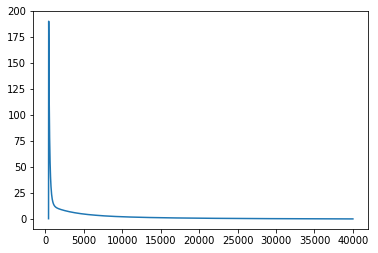

In [2]:
reddening = Table.read('/home/aalvarez/Work/Data/dc3/AuxiliaryData/ReddeningCurves/calzetti.dat', format='ascii')
pyplot.plot(reddening['col1'], reddening['col2'])

In [3]:
len(reddening)

1981

So there may be one of this per object in the target catalog. There will also be the filter shifts.
Can use just a sample of that.

In [4]:
subset_i = np.random.choice(range(200), size=10)
subset_i = np.append(subset_i, [0, len(reddening)-1])
subset = reddening[sorted(subset_i)]

In [5]:
x = np.array(range(40000))

In [6]:
y = 200 - (40000/(x+1))**2

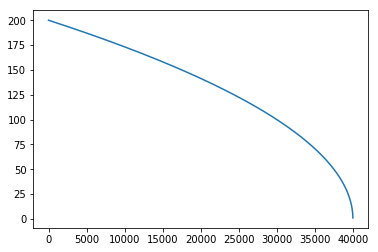

In [7]:
pyplot.plot(x, np.sqrt(40000-x))

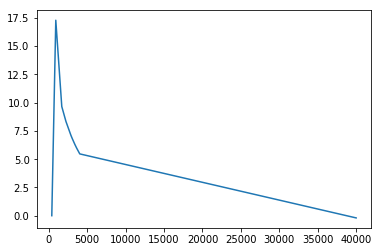

In [8]:
pyplot.plot(subset['col1'], subset['col2'])

In [9]:
for r in subset:
    print("({}, {}),".format(r[0], r[1]))

(400.0, 0.0),
(920.0, 17.29042),
(1700.0, 9.65594),
(2240.0, 8.33963),
(2880.0, 7.12634),
(2960.0, 6.99165),
(3080.0, 6.79586),
(3380.0, 6.33743),
(3440.0, 6.25079),
(3640.0, 5.97332),
(4040.0, 5.4669),
(40000.0, -0.19657),


**Note**: It wasn't that. It is just supposed to be an float.

Let's try the same for the SED and the PDZ

In [10]:
sed = Table.read('/home/aalvarez/Work/Data/dc3/AuxiliaryData/SEDs/Cosmos/S0_A_0.sed', format='ascii')

In [11]:
subset_i = np.random.choice(range(len(sed)), size=15)
subset_i = np.append(subset_i, [0])
subset = sed[sorted(subset_i)]

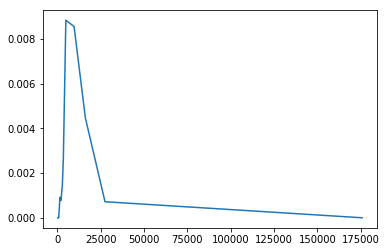

In [12]:
pyplot.plot(subset['col1'], subset['col2'])

Shift

In [13]:
x = subset['col1']
y = subset['col2']

In [14]:
print(np.trapz(x, y))
print(np.trapz(x*2, y/2))

-177.115212198
-177.115212198


In [15]:
new_sed = np.column_stack([x*2, y/2])

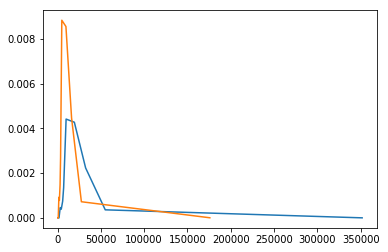

In [16]:
pyplot.plot(new_sed[:, 0], new_sed[:, 1])
pyplot.plot(x, y)

In [17]:
for r in new_sed:
    print("({}, {}),".format(r[0], r[1]))

(632.46, 0.0),
(741.36, 0.0),
(760.38, 0.0),
(1686.66, 0.0),
(3126.3, 0.0004608022),
(3741.36, 0.0004274116),
(3963.06, 0.0004253779),
(4008.94, 0.000407638),
(4325.44, 0.00039149345),
(5929.66, 0.0007459934),
(7063.66, 0.00134879175),
(9909.0, 0.00441591535),
(19410.2, 0.00427582905),
(32436.2, 0.00223292575),
(55084.58, 0.0003613328),
(351584.62, 3.24165e-06),


In [18]:
sed = np.column_stack([x, y])
for r in sed:
    print("({}, {}),".format(r[0], r[1]))

(316.23, 0.0),
(370.68, 0.0),
(380.19, 0.0),
(843.33, 0.0),
(1563.15, 0.0009216044),
(1870.68, 0.0008548232),
(1981.53, 0.0008507558),
(2004.47, 0.000815276),
(2162.72, 0.0007829869),
(2964.83, 0.0014919868),
(3531.83, 0.0026975835),
(4954.5, 0.0088318307),
(9705.1, 0.0085516581),
(16218.1, 0.0044658515),
(27542.29, 0.0007226656),
(175792.31, 6.4833e-06),


In [19]:
z = np.random.random() * 3
new_sed = np.ndarray(sed.shape)
new_sed[:, 0] = sed[:, 0] * z
new_sed[:, 1] = sed[:, 1] / z
print(z)

1.4658348405885695


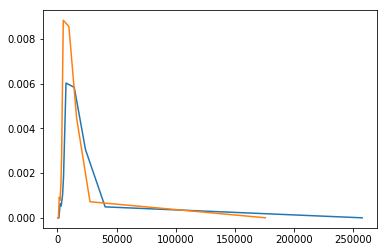

In [20]:
pyplot.plot(new_sed[:, 0], new_sed[:, 1])
pyplot.plot(x, y)

Try creating a fake filter

In [21]:
import matplotlib.mlab as mlab

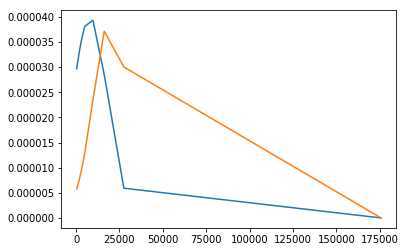

In [35]:
f1 = mlab.normpdf(x, 8000, 10000)
f2 = mlab.normpdf(x, 20000, 10000)
pyplot.plot(x, f1)
pyplot.plot(x, f2)

In [39]:
for i in range(len(x)):
    print(f"({x[i]}, {f1[i]*100}),")

(316.23, 0.0029696525300608894),
(370.68, 0.002982058820932175),
(380.19, 0.002984221884366831),
(843.33, 0.00308810283267524),
(1563.15, 0.0032429433869621896),
(1870.68, 0.0033062140442404143),
(1981.53, 0.0033285496017639612),
(2004.47, 0.0033331395241643076),
(2162.72, 0.003364493295066682),
(2964.83, 0.003514445903513926),
(3531.83, 0.0036104190431563562),
(4954.5, 0.0038086363380137388),
(9705.1, 0.003931848728860821),
(16218.1, 0.002846131551056351),
(27542.29, 0.0005910474764314877),
(175792.31, 2.915498323779237e-64),


In [38]:
for i in range(len(x)):
    print("({}, {}),".format(x[i], f2[i]*100))

(316.23, 0.0005748722439678557),
(370.68, 0.0005810581398648086),
(380.19, 0.0005821435789837749),
(843.33, 0.0006368357743890615),
(1563.15, 0.0007291027358410574),
(1870.68, 0.0007712716301945931),
(1981.53, 0.0007868798221959714),
(2004.47, 0.0007901369926671643),
(2162.72, 0.0008128601274419366),
(2964.83, 0.000934878668096936),
(3531.83, 0.0010280290691792255),
(4954.5, 0.0012863531618668483),
(9705.1, 0.0023483706088576477),
(16218.1, 0.0037140863842206953),
(27542.29, 0.0030018112832734846),
(175792.31, 7.880861401395788e-56),


For the SED I am using a file directly. Otherwise, with too few data points, it fails for some reddening.

Not sure how did it go. Configurable is.

In [40]:
recomputed = Table.read('/home/aalvarez/Work/Data/dc3/nnpz/recomputed.fits')

In [46]:
copied = Table.read('/home/aalvarez/Work/Data/dc3/nnpz/copied.fits')

In [47]:
print(len(recomputed))
print(len(copied))

1000
1000


In [48]:
sum(recomputed['NeighborWeights']-copied['NeighborWeights'])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

I guess it makes sense because I do not pass yet any value for the shift or the E(B-V).
Let's try just some fake values.

In [49]:
recomputed = Table.read('/home/aalvarez/Work/Data/dc3/nnpz/recomputed.fits')
sum(recomputed['NeighborWeights']-copied['NeighborWeights'])

array([-76.94864865, -58.492309  , -56.62374846, -57.0580145 ,
       -57.23851512, -57.86596109, -57.15222063, -56.14909668,
       -57.01228538, -55.5507339 , -57.29193845, -56.81073027,
       -57.77856777, -56.08760372, -57.94672182, -58.30225172,
       -56.93590613, -55.84403031, -55.49653678, -54.87373717,
       -55.25352485, -57.49694598, -56.35091801, -55.42078692,
       -55.23669005, -56.20486753, -55.6117898 , -57.31982522,
       -56.92960426, -56.52710013])

This is with some fake shifts. So at least it does something different.